<a href="https://colab.research.google.com/github/jdzuluaga/Machine_Learning/blob/main/AirPollution/AirPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
Testing_dataset = pd.read_csv('/content/Testing.csv')
Training_dataset = pd.read_csv('/content/Training.csv')

In [ ]:
#Training_dataset.head()

In [ ]:
Training_dataset.drop(["Unnamed: 133"], axis = 1, inplace = True)

In [ ]:
#Training_dataset

In [ ]:
dataset = pd.concat([Training_dataset, Testing_dataset])

In [ ]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

In [ ]:
y_dum = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y_dum, train_size=0.8)

In [ ]:
y_train

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,prognosis_Common Cold,prognosis_Dengue,prognosis_Diabetes,prognosis_Dimorphic hemmorhoids(piles),prognosis_Drug Reaction,prognosis_Fungal infection,prognosis_GERD,prognosis_Gastroenteritis,prognosis_Heart attack,prognosis_Hepatitis B,prognosis_Hepatitis C,prognosis_Hepatitis D,prognosis_Hepatitis E,prognosis_Hypertension,prognosis_Hyperthyroidism,prognosis_Hypoglycemia,prognosis_Hypothyroidism,prognosis_Impetigo,prognosis_Jaundice,prognosis_Malaria,prognosis_Migraine,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1177,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
570,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model = Sequential()
model.add(Dense(units=X_train.shape[1] ))
model.add(Activation('relu'))
model.add(Dense(units=y_train.shape[1]))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=30, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
133/133 [==============================] - 5s 19ms/step - loss: 1.9651 - accuracy: 0.8186 - val_loss: 0.4045 - val_accuracy: 1.0000
Epoch 2/5
133/133 [==============================] - 1s 9ms/step - loss: 0.1581 - accuracy: 0.9997 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 3/5
133/133 [==============================] - 1s 10ms/step - loss: 0.0376 - accuracy: 0.9997 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 4/5
133/133 [==============================] - 1s 7ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 5/5
133/133 [==============================] - 1s 8ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 132)               17556     
                                                                 
 activation (Activation)     (None, 132)               0         
                                                                 
 dense_1 (Dense)             (None, 41)                5453      
                                                                 
 activation_1 (Activation)   (None, 41)                0         
                                                                 
Total params: 23,009
Trainable params: 23,009
Non-trainable params: 0
_________________________________________________________________


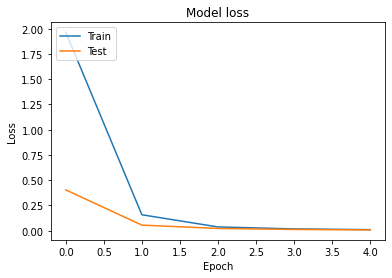

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



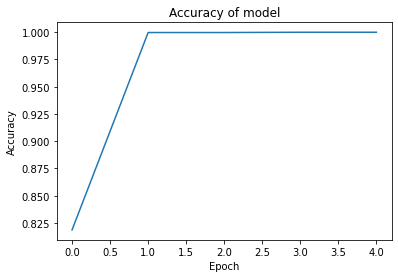

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy of model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
